<a href="https://colab.research.google.com/github/Davron030901/Machine_Learning/blob/main/Full_regressiya_diamond_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
olmos=sns.load_dataset('diamonds')

In [3]:
olmos.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
olmos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
olmos.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [6]:
olmos.duplicated().sum()

146

In [7]:
olmos.drop_duplicates(inplace=True,ignore_index=True)

In [8]:
olmos.clarity.unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [9]:
list(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])[::-1]

['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [10]:
olmos.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [11]:
list(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])[::-1]

['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

In [12]:
olmos.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [13]:
olmos.carat.unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

In [14]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [15]:
scaler = StandardScaler()
one_hot = OneHotEncoder(sparse_output=False)
ord = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                                 ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])


In [16]:
num_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
cat_columns = ['color']
cat_ord_columns = ['cut', 'clarity']

In [17]:
ct = ColumnTransformer(
    transformers=[
        ("num", scaler, num_columns),            # Scale numerical columns
        ("cat", one_hot, cat_columns),           # One-hot encode nominal categorical columns
        ("cat_ord", ord, cat_ord_columns)        # Ordinal encode ordered categorical columns
    ],
    remainder='passthrough'                     # Retain any remaining columns
).set_output(transform="pandas")

In [18]:
diamonds_transformed = ct.fit_transform(olmos)

In [19]:
diamonds_transformed

,num__carat,num__depth,num__table,num__price,num__x,num__y,num__z,cat__color_D,cat__color_E,cat__color_F,cat__color_G,cat__color_H,cat__color_I,cat__color_J,cat_ord__cut,cat_ord__clarity
0,-1.199402,-0.173495,-1.100486,-0.904462,-1.589399,-1.537553,-1.572574,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
1,-1.241651,-1.362393,1.585691,-0.904462,-1.642938,-1.660231,-1.742780,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
2,-1.199402,-3.390512,3.376475,-0.904211,-1.500168,-1.458689,-1.742780,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,-1.072656,0.455922,0.242603,-0.902456,-1.366321,-1.318485,-1.288899,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0
4,-1.030407,1.085338,0.242603,-0.902205,-1.241397,-1.213332,-1.118694,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53789,-0.164306,-0.663041,-0.205093,-0.294895,0.016763,0.022211,-0.054911,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0
53790,-0.164306,0.945468,-1.100486,-0.294895,-0.036776,0.013448,0.101111,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
53791,-0.206555,0.735662,1.137995,-0.294895,-0.063546,-0.047891,0.030192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
53792,0.131436,-0.523171,0.242603,-0.294895,0.373687,0.337668,0.285500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0


<Axes: >

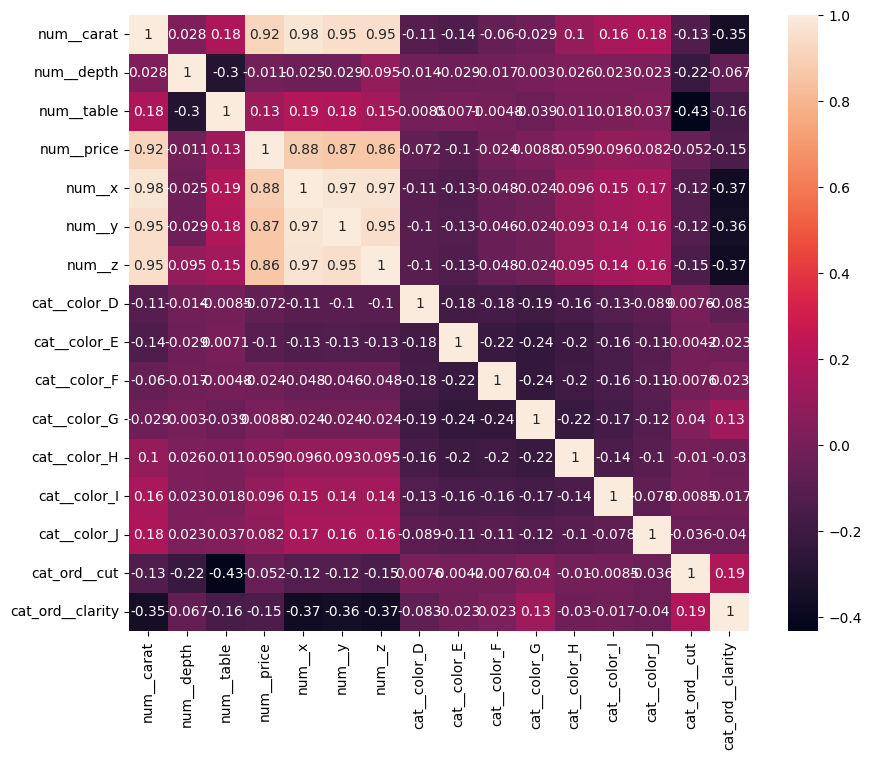

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(diamonds_transformed.corr(),annot=True)

In [21]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Example dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression
lasso = Lasso(alpha=0.1)  # alpha is λ
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Coefficients:", lasso.coef_)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # alpha is λ
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Coefficients:", ridge.coef_)

Lasso MSE: 0.18237823772606268
Lasso Coefficients: [16.68551572 54.04466658  5.03023843 63.54923618 93.45872786 70.54211442
 86.95689868 10.27114941  3.06974112 70.78354482]
Ridge MSE: 11.844580603662115
Ridge Coefficients: [16.95562623 53.26139273  5.14229184 62.71297072 92.14122801 69.72025958
 86.01729963  9.90576126  3.25096976 69.63820737]


In [22]:
X=diamonds_transformed.drop(columns=['num__price'])
y=diamonds_transformed['num__price']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

<Axes: >

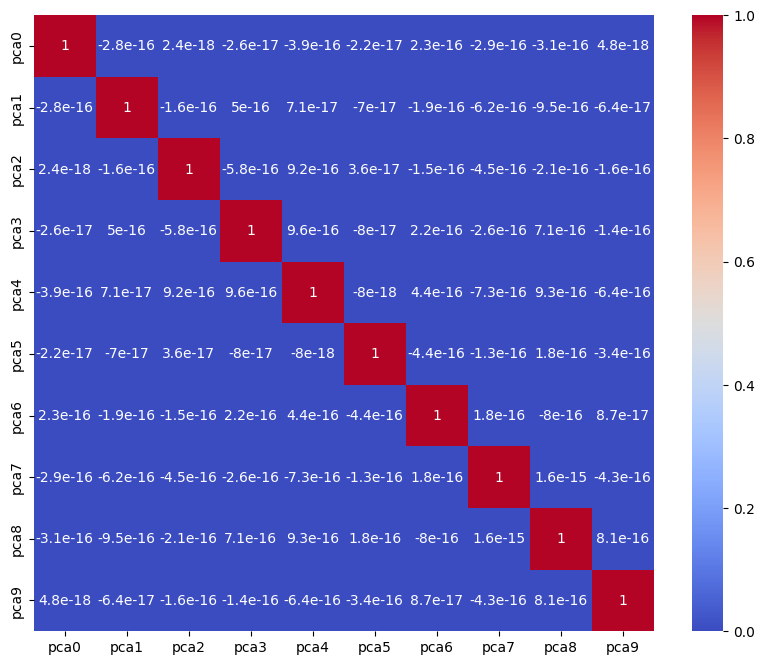

In [50]:
# PCA(principal component analysis)

from sklearn.decomposition import PCA

pca = PCA(n_components=10).set_output(transform='pandas')

pca.fit(diamonds_transformed)

df_pca = pca.transform(diamonds_transformed)
plt.figure(figsize=(10, 8))
sns.heatmap(df_pca.corr(), annot=True, cmap='coolwarm')

In [54]:
X = df_pca
y = diamonds_transformed.num__price

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lr=LinearRegression()
ridge=Ridge()
lasso=Lasso()

In [57]:
%%time
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

MSE: 0.008413262200974507
R2: 0.9912209480082934
MAE: 0.06560173676051159
CPU times: user 34.9 ms, sys: 1.79 ms, total: 36.7 ms
Wall time: 25.2 ms


In [58]:
%%time
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

MSE: 0.008412957957371021
R2: 0.9912212654797272
MAE: 0.0656077002295907
CPU times: user 22.1 ms, sys: 8.25 ms, total: 30.4 ms
Wall time: 30.3 ms


In [59]:
%%time
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

MSE: 0.47503182439319275
R2: 0.5043148561826589
MAE: 0.48987764373633896
CPU times: user 31.4 ms, sys: 3.79 ms, total: 35.2 ms
Wall time: 22.6 ms


In [60]:
%%time
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

# Define the parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Grid of values for regularization strength

# Perform GridSearchCV
gsCV = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
gsCV.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", gsCV.best_params_)
print("Best CV Score (neg MSE):", gsCV.best_score_)

# Predictions and Evaluation
y_pred = gsCV.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

Best Parameters: {'alpha': 1}
Best CV Score (neg MSE): -0.008702865929514216
MSE: 0.008412957957371021
R2: 0.9912212654797272
MAE: 0.0656077002295907
CPU times: user 483 ms, sys: 363 ms, total: 846 ms
Wall time: 457 ms


In [61]:
%%time
lasso = Lasso()

# Define the parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Grid of values for regularization strength

# Perform GridSearchCV
gsCV = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
gsCV.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", gsCV.best_params_)
print("Best CV Score (neg MSE):", gsCV.best_score_)

# Predictions and Evaluation
y_pred = gsCV.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

Best Parameters: {'alpha': 0.01}
Best CV Score (neg MSE): -0.011987023412693332
MSE: 0.011373849659228625
R2: 0.9881316408404988
MAE: 0.08017753567402458
CPU times: user 1.15 s, sys: 434 ms, total: 1.58 s
Wall time: 865 ms


In [62]:
%%time
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

MSE: 0.005905938282216007
R2: 0.9938372847534244
MAE: 0.04441270226331579
CPU times: user 1.55 s, sys: 635 µs, total: 1.55 s
Wall time: 1.96 s


In [63]:
from sklearn.ensemble import (RandomForestRegressor,
                              ExtraTreesRegressor,
                              GradientBoostingRegressor,
                              AdaBoostRegressor,
                              BaggingRegressor)
from sklearn.svm import SVR

In [64]:
rfr=RandomForestRegressor()
etr=ExtraTreesRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()
br=BaggingRegressor()
svr=SVR()

In [65]:
%%time
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

MSE: 0.002544266206843758
R2: 0.9973451147988665
MAE: 0.02750107234595253
CPU times: user 1min 32s, sys: 2.43 ms, total: 1min 32s
Wall time: 1min 44s


In [66]:
%%time
etr.fit(X_train,y_train)
y_pred=etr.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

MSE: 0.0013690629805542872
R2: 0.9985714132284128
MAE: 0.020354738149739388
CPU times: user 22.9 s, sys: 493 ms, total: 23.4 s
Wall time: 28.3 s


In [67]:
%%time
gbr.fit(X_train,y_train)
y_pred=gbr.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

MSE: 0.008830124587469188
R2: 0.9907859613792068
MAE: 0.06210887298243229
CPU times: user 32.2 s, sys: 0 ns, total: 32.2 s
Wall time: 36.4 s


In [68]:
%%time
abr.fit(X_train,y_train)
y_pred=abr.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

MSE: 0.08415090493801004
R2: 0.9121904022539113
MAE: 0.2517196372392561
CPU times: user 9.01 s, sys: 0 ns, total: 9.01 s
Wall time: 9.24 s


In [69]:
%%time
br.fit(X_train,y_train)
y_pred=br.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

MSE: 0.003061668565455831
R2: 0.9968052169449328
MAE: 0.03072836442694879
CPU times: user 8.27 s, sys: 17.8 ms, total: 8.29 s
Wall time: 8.25 s


In [70]:
%%time
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

MSE: 0.002647349453743665
R2: 0.9972375497233475
MAE: 0.03570931002609123
CPU times: user 7.02 s, sys: 352 ms, total: 7.37 s
Wall time: 9.37 s


In [71]:
!pip install xgboost

In [72]:
%%time
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

MSE: 0.0028515126053228865
R2: 0.9970245100153616
MAE: 0.032132363563860185
CPU times: user 1.55 s, sys: 6.15 ms, total: 1.55 s
Wall time: 914 ms


In [73]:
!pip install lightgbm

In [74]:
%%time
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 43035, number of used features: 10
[LightGBM] [Info] Start training from score 0.002963
MSE: 0.0030867140410759273
R2: 0.9967790825481467
MAE: 0.036058666686819486
CPU times: user 975 ms, sys: 2.37 ms, total: 977 ms
Wall time: 1.03 s


In [75]:
!pip install catboost

In [76]:
%%time
from catboost import CatBoostRegressor
cbr=CatBoostRegressor()
cbr.fit(X_train,y_train)
y_pred=cbr.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

Learning rate set to 0.074186
0:	learn: 0.9389736	total: 12.3ms	remaining: 12.3s
1:	learn: 0.8772173	total: 21.8ms	remaining: 10.9s
2:	learn: 0.8203242	total: 30.6ms	remaining: 10.2s
3:	learn: 0.7674964	total: 39.6ms	remaining: 9.86s
4:	learn: 0.7185947	total: 48.3ms	remaining: 9.62s
5:	learn: 0.6731196	total: 56.7ms	remaining: 9.4s
6:	learn: 0.6301052	total: 65.4ms	remaining: 9.28s
7:	learn: 0.5910320	total: 74.4ms	remaining: 9.23s
8:	learn: 0.5547045	total: 83ms	remaining: 9.14s
9:	learn: 0.5205649	total: 91.7ms	remaining: 9.08s
10:	learn: 0.4884920	total: 100ms	remaining: 8.99s
11:	learn: 0.4586948	total: 109ms	remaining: 8.95s
12:	learn: 0.4315648	total: 118ms	remaining: 8.95s
13:	learn: 0.4063111	total: 127ms	remaining: 8.92s
14:	learn: 0.3825861	total: 135ms	remaining: 8.85s
15:	learn: 0.3609642	total: 143ms	remaining: 8.81s
16:	learn: 0.3405794	total: 152ms	remaining: 8.77s
17:	learn: 0.3219322	total: 160ms	remaining: 8.75s
18:	learn: 0.3042958	total: 169ms	remaining: 8.72s
19:	

In [77]:
%%time
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

MSE: 0.013093035570555085
R2: 0.9863377085775537
MAE: 0.0686565186928492
CPU times: user 939 ms, sys: 5.02 ms, total: 944 ms
Wall time: 1.41 s


In [78]:
%%time
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

MSE: 0.00055493505367223
R2: 0.9994209376135164
MAE: 0.01502842675013479
CPU times: user 7.49 s, sys: 7.16 s, total: 14.6 s
Wall time: 17 s


In [82]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
print(ridge.score(X_test,y_test),ridge.score(X_train,y_train))
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

0.9912212654797272 0.9913942122298146
MSE: 0.008412957957371021
R2: 0.9912212654797272
MAE: 0.0656077002295907


In [83]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
print(lasso.score(X_test,y_test),lasso.score(X_train,y_train))
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

0.5043148561826589 0.5071058959132502
MSE: 0.47503182439319275
R2: 0.5043148561826589
MAE: 0.48987764373633896


In [84]:
from sklearn.linear_model import RidgeCV
alphas=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10 , 20, 30, 40, 50, 100]
ridge_cv=RidgeCV(alphas=alphas)
ridge_cv.fit(X_train, y_train)

ridge_cv.score(X_train, y_train), ridge_cv.score(X_test, y_test)

(0.9913941618406786, 0.9912224896148933)

In [85]:
ridge_cv.coef_

array([-3.57217104e-01,  3.07047103e-01,  2.60994032e-03,  1.75396282e-02,
       -4.75542419e-04, -8.49515397e-02,  1.60447843e-01, -4.49087011e-01,
        5.14501096e-01, -2.88614743e-01])

In [86]:
ridge_cv.intercept_

4.173755697160124e-05

In [87]:
ridge_cv.alpha_

5.0

In [88]:
from sklearn.linear_model import LassoCV
alphas=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10 , 20, 30, 40, 50, 100]
lasso_cv=LassoCV(alphas=alphas)
lasso_cv.fit(X_train, y_train)

lasso_cv.score(X_train, y_train), lasso_cv.score(X_test, y_test)

(0.9881427816410452, 0.9881316408404988)

In [89]:
ridge_cv.coef_

array([-3.57217104e-01,  3.07047103e-01,  2.60994032e-03,  1.75396282e-02,
       -4.75542419e-04, -8.49515397e-02,  1.60447843e-01, -4.49087011e-01,
        5.14501096e-01, -2.88614743e-01])

In [90]:
ridge_cv.intercept_

4.173755697160124e-05

In [91]:
ridge_cv.alpha_

5.0

In [92]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

elasticnet.fit(X_train, y_train)

elasticnet.score(X_train, y_train), elasticnet.score(X_test, y_test)


(0.9317723889316345, 0.9297227641391823)

In [93]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

dt.score(X_train, y_train), dt.score(X_test, y_test)

(1.0, 0.9932996977691422)

In [95]:
gb.train_score_

array([0.84366653, 0.70842291, 0.59604784, 0.50496127, 0.42905912,
       0.36519871, 0.31266432, 0.26940571, 0.23196629, 0.20061838,
       0.17471267, 0.15188797, 0.13323976, 0.11780527, 0.10460024,
       0.09244117, 0.08315207, 0.07534972, 0.06871224, 0.06210409,
       0.05717639, 0.05228324, 0.04831513, 0.04497226, 0.0419177 ,
       0.03869238, 0.03629531, 0.03375811, 0.03169174, 0.02958282,
       0.02817064, 0.02688208, 0.02539244, 0.02391767, 0.02287844,
       0.02207307, 0.02117062, 0.02041017, 0.01964478, 0.01874757,
       0.0181199 , 0.01749607, 0.01684892, 0.01625943, 0.01592866,
       0.01542861, 0.01498831, 0.01466089, 0.01417307, 0.0137614 ,
       0.01356275, 0.01320174, 0.01291378, 0.01264584, 0.01238787,
       0.01216308, 0.0119526 , 0.0118164 , 0.01159478, 0.01143898,
       0.0112441 , 0.01108062, 0.01092518, 0.01077233, 0.01062658,
       0.01047227, 0.01037693, 0.01028315, 0.01018699, 0.01011144,
       0.01002789, 0.00996464, 0.00985141, 0.00969242, 0.00958

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

gb.fit(X_train, y_train)

gb.score(X_train, y_train), gb.score(X_test, y_test)

(0.9923399011880767, 0.9908611490912668)

In [96]:
gb.train_score_

array([0.84366653, 0.70842291, 0.59604784, 0.50496127, 0.42905912,
       0.36519871, 0.31266432, 0.26940571, 0.23196629, 0.20061838,
       0.17471267, 0.15188797, 0.13323976, 0.11780527, 0.10460024,
       0.09244117, 0.08315207, 0.07534972, 0.06871224, 0.06210409,
       0.05717639, 0.05228324, 0.04831513, 0.04497226, 0.0419177 ,
       0.03869238, 0.03629531, 0.03375811, 0.03169174, 0.02958282,
       0.02817064, 0.02688208, 0.02539244, 0.02391767, 0.02287844,
       0.02207307, 0.02117062, 0.02041017, 0.01964478, 0.01874757,
       0.0181199 , 0.01749607, 0.01684892, 0.01625943, 0.01592866,
       0.01542861, 0.01498831, 0.01466089, 0.01417307, 0.0137614 ,
       0.01356275, 0.01320174, 0.01291378, 0.01264584, 0.01238787,
       0.01216308, 0.0119526 , 0.0118164 , 0.01159478, 0.01143898,
       0.0112441 , 0.01108062, 0.01092518, 0.01077233, 0.01062658,
       0.01047227, 0.01037693, 0.01028315, 0.01018699, 0.01011144,
       0.01002789, 0.00996464, 0.00985141, 0.00969242, 0.00958

In [97]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor()

et.fit(X_train, y_train)

et.score(X_train, y_train), et.score(X_test, y_test)

(1.0, 0.9986002104101416)

In [98]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9996556657509862, 0.9973134202574895)

In [99]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.9916709971880614, 0.9863377085775537)